In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

In [2]:
removed_columns = ["island", "island_id", "kb_id", "bag_id", "capture_temp", "substrate_temp", "time_of_capture"]

In [3]:
"""island = remove
Island_id = remove
kb_id = remove 
bag_id  = remove
Sex m = 1, f = 0
Gravid 1, 0, -1
Morph
- if not o,y,w remove
- y, o, w = 2, 1, 0
j= remove
Scars, ticks, mites
If n/a = 0
Substrate type 
Grass = leaves, shrub, wall = stonewall, tree = branch, rock, cement=ground=dirt, e5 = (6, 5, 4, 3, 2, 1, 0)"""

'island = remove\nIsland_id = remove\nkb_id = remove \nbag_id  = remove\nSex m = 1, f = 0\nGravid 1, 0, -1\nMorph\n- if not o,y,w remove\n- y, o, w = 2, 1, 0\nj= remove\nScars, ticks, mites\nIf n/a = 0\nSubstrate type \nGrass = leaves, shrub, wall = stonewall, tree = branch, rock, cement=ground=dirt, e5 = (6, 5, 4, 3, 2, 1, 0)'

In [4]:
data = pd.read_csv('please_work.csv')

In [5]:
data

,island,island_id,kb_id,bag_id,sex,gravid,morph,capture_temp,substrate_temp,time_of_capture,...,head_width,head_depth,bicep_length,forearm_length,hand_finger_length,femur_length,tibia_length,toe,autotomy,substrate_type
0,naxos,1,NaN,A1,m,na,o,22.4,28.5,8:40,...,9.45,7.81,6.46,7.39,8.10,12.74,10.50,16.72,0.0,NaN
1,naxos,2,NaN,A2,m,na,y,NaN,NaN,8:45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,naxos,3,NaN,A3,m,na,w,NaN,NaN,9:15,...,8.22,6.09,5.84,5.84,7.35,11.95,10.02,16.70,1.0,NaN
3,naxos,4,NaN,A4,m,na,y,19.2,29.1,9:25,...,9.35,7.71,8.26,7.97,8.29,14.48,13.03,NaN,0.0,NaN
4,naxos,5,NaN,A5,m,na,y,18.3,20.1,8:26,...,10.10,7.62,7.02,7.11,8.26,14.24,11.70,17.70,1.0,grass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,andros,251,NaN,D5,f,y,w,30.5,27.8,9:43,...,8.45,5.96,7.10,6.36,8.75,14.15,11.22,17.72,0.0,NaN
251,andros,252,NaN,E10,f,n,y,35.6,45.8,12:24,...,8.34,6.77,7.07,7.06,8.70,13.12,10.78,16.70,1.0,NaN
252,andros,253,NaN,D6,f,y,o,33.2,36.8,14:11,...,8.26,6.64,6.58,6.50,7.68,12.83,10.96,16.50,1.0,NaN
253,andros,254,NaN,D7,f,y,o,31.5,32.9,14:18,...,8.63,6.30,8.23,6.53,8.29,14.34,10.48,17.13,1.0,NaN


In [6]:
data = data.drop(removed_columns, axis=1)

In [7]:
data = data.dropna()

In [8]:
data

,sex,gravid,morph,scars,ticks,mites,mass,svl,head_length,head_width,head_depth,bicep_length,forearm_length,hand_finger_length,femur_length,tibia_length,toe,autotomy,substrate_type
4,m,na,y,0.0,0.0,0.0,8.1,65.89,18.12,10.10,7.62,7.02,7.11,8.26,14.24,11.70,17.70,1.0,grass
7,f,y,w,5.0,0.0,0.0,6.3,64.69,15.54,8.12,6.66,6.91,6.76,7.98,9.88,10.16,15.59,1.0,dirt
8,m,na,o,3.0,4.0,0.0,7.8,65.75,17.97,9.09,7.64,6.90,7.34,8.52,14.50,11.11,17.96,1.0,dirt
10,f,y,w,3.0,0.0,0.0,6.4,63.48,15.07,7.83,6.55,5.94,6.11,7.22,10.36,9.83,14.47,1.0,tree
12,m,na,o,9.0,2.0,0.0,7.7,64.99,17.39,9.45,7.55,6.53,6.81,8.25,13.35,10.15,17.39,0.0,stone wall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,f,n,w,13.0,0.0,14.0,6.6,75.46,17.23,8.60,6.60,7.22,7.23,8.30,14.51,11.17,17.78,1.0,wall
232,m,na,w,8.0,0.0,0.0,10.1,73.90,19.26,10.30,8.27,7.77,8.32,9.68,15.99,12.91,19.95,0.0,wall
234,m,na,w,9.0,0.0,740.0,10.0,74.69,19.20,10.17,7.86,7.79,8.35,10.47,16.90,13.06,20.46,1.0,wall
235,m,na,w,5.0,3.0,38.0,7.4,64.26,17.18,9.75,7.26,7.13,7.20,9.31,14.51,11.20,19.43,1.0,wall


In [9]:
data['scars'] = data['scars'].astype('int')
data['ticks'] = data['ticks'].astype('int')
data['mites'] = data['mites'].astype('int')

In [10]:
data

,sex,gravid,morph,scars,ticks,mites,mass,svl,head_length,head_width,head_depth,bicep_length,forearm_length,hand_finger_length,femur_length,tibia_length,toe,autotomy,substrate_type
4,m,na,y,0,0,0,8.1,65.89,18.12,10.10,7.62,7.02,7.11,8.26,14.24,11.70,17.70,1.0,grass
7,f,y,w,5,0,0,6.3,64.69,15.54,8.12,6.66,6.91,6.76,7.98,9.88,10.16,15.59,1.0,dirt
8,m,na,o,3,4,0,7.8,65.75,17.97,9.09,7.64,6.90,7.34,8.52,14.50,11.11,17.96,1.0,dirt
10,f,y,w,3,0,0,6.4,63.48,15.07,7.83,6.55,5.94,6.11,7.22,10.36,9.83,14.47,1.0,tree
12,m,na,o,9,2,0,7.7,64.99,17.39,9.45,7.55,6.53,6.81,8.25,13.35,10.15,17.39,0.0,stone wall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,f,n,w,13,0,14,6.6,75.46,17.23,8.60,6.60,7.22,7.23,8.30,14.51,11.17,17.78,1.0,wall
232,m,na,w,8,0,0,10.1,73.90,19.26,10.30,8.27,7.77,8.32,9.68,15.99,12.91,19.95,0.0,wall
234,m,na,w,9,0,740,10.0,74.69,19.20,10.17,7.86,7.79,8.35,10.47,16.90,13.06,20.46,1.0,wall
235,m,na,w,5,3,38,7.4,64.26,17.18,9.75,7.26,7.13,7.20,9.31,14.51,11.20,19.43,1.0,wall


In [12]:
data

,sex,gravid,morph,scars,ticks,mites,mass,svl,head_length,head_width,head_depth,bicep_length,forearm_length,hand_finger_length,femur_length,tibia_length,toe,autotomy,substrate_type
4,m,na,y,0,0,0,8.1,65.89,18.12,10.10,7.62,7.02,7.11,8.26,14.24,11.70,17.70,1.0,grass
7,f,y,w,5,0,0,6.3,64.69,15.54,8.12,6.66,6.91,6.76,7.98,9.88,10.16,15.59,1.0,dirt
8,m,na,o,3,4,0,7.8,65.75,17.97,9.09,7.64,6.90,7.34,8.52,14.50,11.11,17.96,1.0,dirt
10,f,y,w,3,0,0,6.4,63.48,15.07,7.83,6.55,5.94,6.11,7.22,10.36,9.83,14.47,1.0,tree
12,m,na,o,9,2,0,7.7,64.99,17.39,9.45,7.55,6.53,6.81,8.25,13.35,10.15,17.39,0.0,stone wall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,f,n,w,13,0,14,6.6,75.46,17.23,8.60,6.60,7.22,7.23,8.30,14.51,11.17,17.78,1.0,wall
232,m,na,w,8,0,0,10.1,73.90,19.26,10.30,8.27,7.77,8.32,9.68,15.99,12.91,19.95,0.0,wall
234,m,na,w,9,0,740,10.0,74.69,19.20,10.17,7.86,7.79,8.35,10.47,16.90,13.06,20.46,1.0,wall
235,m,na,w,5,3,38,7.4,64.26,17.18,9.75,7.26,7.13,7.20,9.31,14.51,11.20,19.43,1.0,wall


In [58]:
strings = ["cement, ground, and dirt", "rocks", "trees and branches", "stone walls and walls", "leaves, shrubs, and grass"]

In [14]:
transposed_processed_matrix = []
for var in data:
    col = data[var]
    to_append = []
    if var == "sex":
        for x in col:
            if x == 'm':
                to_append.append(1)
            else:
                to_append.append(0)
    elif var == "gravid":
        for x in col:
            if x == 'y':
                to_append.append(1)
            elif x == "n":
                to_append.append(0)
            else:
                to_append.append(-1)
    elif var == "morph":
        allowed = ['y', 'o', 'w']
        for x in col:
            if x == 'y':
                to_append.append(2)
            elif x == 'o':
                to_append.append(1)
            elif x == 'w':
                to_append.append(0)
            else:
                to_append.append('')
    elif var == "substrate_type":
        for x in col:
            if x == 'grass' or x == 'leaves' or x == 'shrub' or x == 'grss':
                to_append.append(4)
            elif x == 'wall' or x == 'stone wall':
                to_append.append(3)
            elif x == 'tree' or x == 'branch' or x == 'Tree':
                to_append.append(2)
            elif x == 'rock' or x == 'rocks':
                to_append.append(1)
            elif x == 'cement' or x == 'ground' or x == 'dirt':
                to_append.append(0)
            else:
                to_append.append('')
    if len(to_append) > 0:
        transposed_processed_matrix.append(np.array(to_append))
    else:
        transposed_processed_matrix.append(np.array(col))


In [15]:
transposed_processed_matrix = np.array(transposed_processed_matrix).T

In [16]:
print(np.shape(transposed_processed_matrix))

(155, 19)


In [17]:
final_transponsed_matrix = []
for row in transposed_processed_matrix:
    if not '' in row:
        final_transponsed_matrix.append(row)


In [18]:
print(np.shape(final_transponsed_matrix))

(149, 19)


In [19]:
B = np.array(final_transponsed_matrix, dtype=float)

In [20]:
without_last = B[:, 0:18]

In [21]:
pca = PCA(n_components=1)

In [22]:
pca.fit(without_last)

PCA(n_components=1)

In [23]:
print(pca.explained_variance_ratio_)

[0.98428421]


In [25]:
eigenvectors = pca.components_.T

In [26]:
without_last

array([[ 1.  , -1.  ,  2.  , ..., 11.7 , 17.7 ,  1.  ],
       [ 0.  ,  1.  ,  0.  , ..., 10.16, 15.59,  1.  ],
       [ 1.  , -1.  ,  1.  , ..., 11.11, 17.96,  1.  ],
       ...,
       [ 1.  , -1.  ,  0.  , ..., 13.06, 20.46,  1.  ],
       [ 1.  , -1.  ,  0.  , ..., 11.2 , 19.43,  1.  ],
       [ 0.  ,  1.  ,  0.  , ..., 10.24, 16.72,  0.  ]])

In [27]:
proj = np.dot(without_last, eigenvectors)

In [28]:
last = B[:, 18:19]

In [29]:
colors_array = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

In [30]:
print(proj.shape)

(149, 1)


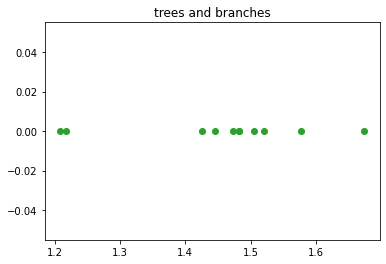

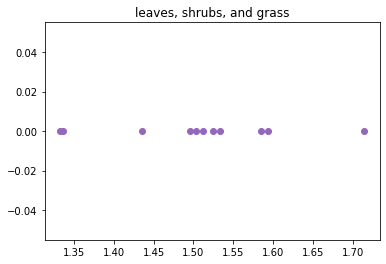

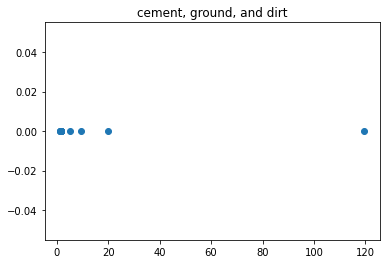

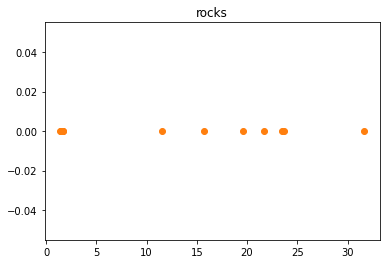

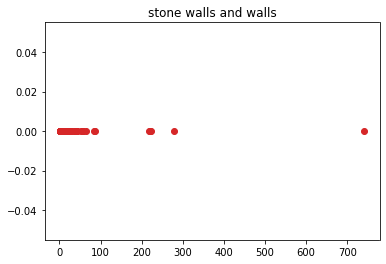

In [59]:
arrays = [[] for i in range(5)]
for oh, color in zip(proj, last):
        plt.figure(int(color))
        plt.title(strings[int(color)])
        plt.scatter(x=oh, y=0, c=colors_array[int(color)])
        arrays[int(color)].extend(oh)
        # title = str(int(color)) + '.pdf'
        # plt.savefig('line_plot.pdf')  
        # plt.legend(["0", '1', '2', '3', '4', '5', '6'])


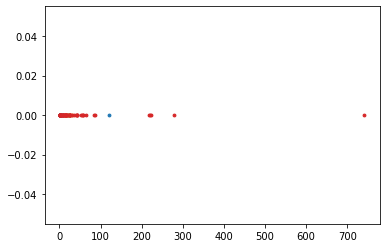

In [42]:
arrays = [[] for i in range(5)]
for oh, color in zip(proj, last):
        plt.scatter(x=oh, y=0, c=colors_array[int(color)], s=8)
        arrays[int(color)].append(oh)

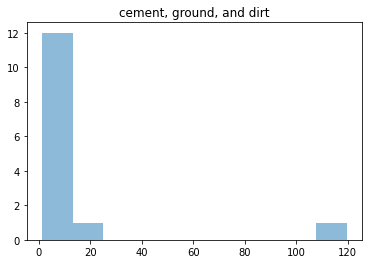

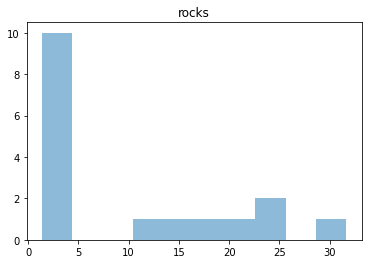

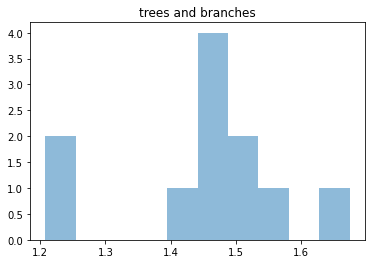

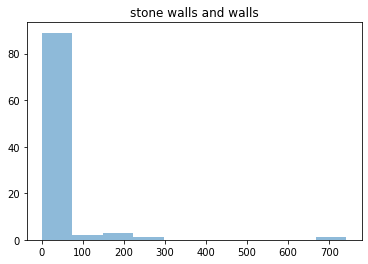

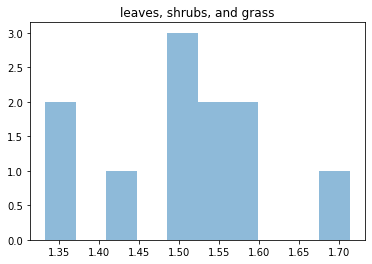

In [83]:

for i in range(len(arrays)):
    plt.figure(i)
    plt.title(strings[i])
    plt.hist(arrays[i], alpha=0.5, label=strings[i])
    title = strings[i] + ".pdf"
    plt.savefig(title)  


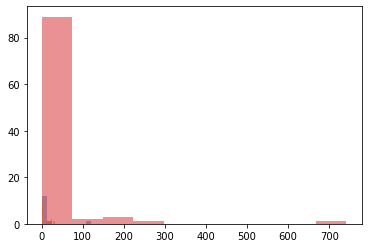

In [84]:

for i in range(len(arrays)):
    plt.hist(arrays[i], alpha=0.5, label=strings[i])
    plt.savefig("all.pdf")


In [67]:
for x in arrays:
    print(len(x))

14
17
11
96
11


In [70]:
from scipy import stats

In [81]:
for i in range(len(arrays)):
    for j in range(len(arrays)):
        if i < j:
            p = stats.ttest_ind(arrays[i], arrays[j]).pvalue
            if p < 0.1:
                print(strings[i], "||", strings[j]) 
                print(p)

rocks || trees and branches
0.018164050089947984
rocks || leaves, shrubs, and grass
0.01881736763756313
